In [290]:
root="./logs/compareAllAttacks/cifar_dirichlet/"
root="./logs/compareAllAttacks/imdb_dirichlet/"

# root="./logs/netRes_experiments/dirichlet/"
# root="./logs/netRes_experiments/cifar_iid/"


In [300]:
def getValueByPath(path):
    try:
        sum_iter=EventAccumulator(path).Reload()

        a=sum_iter.Scalars('test/accuracy')
#         b=sum_iter.Scalars('test/backdoor_success_rate')
        acc=pd.DataFrame(a)[['value']]
        asr=pd.DataFrame(b)[['value']]
        metric=acc.copy()
        metric['acc']=acc['value']
        metric['asr']=asr['value']
        metric=metric[['acc','asr']]
        metric.to_csv(f'./results/rounds/{"_".join(path.split("/")[-2:])}.csv',index=None)
#         print(a[-1])
    except Exception as e:
        print(e)


In [301]:
def getDefenseValue(root, attack):
    defense=sorted(os.listdir(root+attack))
    out=[(attack, defense[i],getValueByPath(root+attack+"/"+defense[i])) for i in range(len(defense))]
    return out

In [305]:
getDefenseValue(root,'omniscient_4(3)')

[('omniscient_4(3)', 'attention', None),
 ('omniscient_4(3)', 'attention_redo', None)]

In [212]:
def getValueByPath(path):
    try:
        sum_iter=EventAccumulator(path).Reload()

        a=sum_iter.Scalars('test/accuracy')
        out=a[-1].value
#         print(a[-1])
    except Exception as e:
        print(e)
        out=None
    return out

In [213]:
def getDefenseValue(root, attack):
    defense=sorted(os.listdir(root+attack))
    out=[(attack, defense[i],getValueByPath(root+attack+"/"+defense[i])) for i in range(len(defense))]
    return out

In [214]:
getValueByPath('./logs/compareAllAttacks/imdb_dirichlet/No_Attack(1)/gm')

79.91999816894531

In [215]:
getDefenseValue(root,attacks[0])

[('No_Attack(0)', 'attention_redo', 74.5),
 ('No_Attack(0)', 'foolsGold', 82.12000274658203),
 ('No_Attack(0)', 'gm', 77.76000213623047),
 ('No_Attack(0)', 'median', 82.45999908447266),
 ('No_Attack(0)', 'mkrum', 51.540000915527344),
 ('No_Attack(0)', 'residualbase', 83.80000305175781)]

In [216]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [217]:
defense

['gm', 'median', 'mkrum', 'residualbase']

In [218]:
attacks=sorted(os.listdir(root))
data=[getDefenseValue(root, attacks[j]) for j in range(len(attacks))]

'Key test/accuracy was not found in Reservoir'


In [219]:
DF=pd.DataFrame(flatten(data))

In [220]:
DF["typeAttack"]=DF[0].apply(lambda x: x[:-3])

In [221]:
Agg=DF[[1,2,'typeAttack']].groupby(['typeAttack',1]).mean()
Agg.head(10)

2
typeAttack      1                        
No_Attack       attention       50.000000
                attention_redo  74.093333
                fedavg          82.539997
                foolsGold       71.526669
                gm              77.886668
                median          83.099998
                mkrum           54.260000
                residualbase    81.466667
labelFlipping_1 attention       80.206668
                attention_redo  79.653333

In [222]:
DF[[1,2,'typeAttack']].groupby(['typeAttack',1]).count()



2
typeAttack   1                
No_Attack    attention       1
             attention_redo  3
             fedavg          2
             foolsGold       3
             gm              3
...                         ..
omniscient_4 foolsGold       1
             gm              3
             median          3
             mkrum           3
             residualbase    3

[72 rows x 1 columns]

In [223]:
pivot=Agg.reset_index().pivot(1,'typeAttack').T
pivot

typeAttack        No_Attack  labelFlipping_1  labelFlipping_2  \
  1                                                             
2 attention       50.000000        80.206668        71.120000   
  attention_redo  74.093333        79.653333        62.866666   
  fedavg          82.539997        78.453334        70.213336   
  foolsGold       71.526669        77.879997        75.419998   
  gm              77.886668        71.266666        62.873332   
  median          83.099998        80.139999        80.919998   
  mkrum           54.260000        52.626667        50.653333   
  residualbase    81.466667        77.480001        69.326667   

typeAttack        labelFlipping_3  labelFlipping_4  omniscient_1  \
  1                                                                
2 attention             49.309999        48.820000     59.573334   
  attention_redo        58.666665        67.460000     74.460002   
  fedavg                64.953335        52.526666     80.300001   
  foolsGold             75.099998        50.240002     81.320000   
  gm                    64.419999        50.020000     69.233335   
  median                74.060000        72.306666     73.840000   
  mkrum                 50.553333        50.973334     54.533334   
  residualbase          58.793334        59.306666     78.986666   

typeAttack        omniscient_2  omniscient_3  omniscient_4  
  1                                                         
2 attention          59.339999     58.839999     52.460000  
  attention_redo     77.140002     58.573334     58.860001  
  fedavg             72.173335     69.273335     51.940001  
  foolsGold          51.340000     50.180000     50.000000  
  gm                 55.120000     51.660001     51.986666  
  median             79.920001     55.020000     53.040000  
  mkrum              50.540000     52.866666     50.993333  
  residualbase       79.829998     52.513334     50.540000

In [224]:
res=pivot[pivot.columns[:5]].round(2)
res

typeAttack        No_Attack  labelFlipping_1  labelFlipping_2  \
  1                                                             
2 attention           50.00            80.21            71.12   
  attention_redo      74.09            79.65            62.87   
  fedavg              82.54            78.45            70.21   
  foolsGold           71.53            77.88            75.42   
  gm                  77.89            71.27            62.87   
  median              83.10            80.14            80.92   
  mkrum               54.26            52.63            50.65   
  residualbase        81.47            77.48            69.33   

typeAttack        labelFlipping_3  labelFlipping_4  
  1                                                 
2 attention                 49.31            48.82  
  attention_redo            58.67            67.46  
  fedavg                    64.95            52.53  
  foolsGold                 75.10            50.24  
  gm                        64.42            50.02  
  median                    74.06            72.31  
  mkrum                     50.55            50.97  
  residualbase              58.79            59.31

In [225]:
res=pivot[pivot.columns[5:imdb.*atten.*redo]].round(2)
res

typeAttack        omniscient_1  omniscient_2  omniscient_3  omniscient_4
  1                                                                     
2 attention              59.57         59.34         58.84         52.46
  attention_redo         74.46         77.14         58.57         58.86
  fedavg                 80.30         72.17         69.27         51.94
  foolsGold              81.32         51.34         50.18         50.00
  gm                     69.23         55.12         51.66         51.99
  median                 73.84         79.92         55.02         53.04
  mkrum                  54.53         50.54         52.87         50.99
  residualbase           78.99         79.83         52.51         50.54

In [208]:
print(res.to_csv(index=None,header=None))

80.3,72.17,69.27,51.94
79.06,52.52,75.62,53.16
69.23,55.12,51.66,51.99
73.84,79.92,55.02,53.04
54.53,50.54,52.87,50.99
78.99,79.83,52.51,50.54



In [171]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tabulate_events(dpath):
    
    print(dpath)

    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath) if 'csv' not in dname]
    tags = summary_iterators[1].Tags()['scalars']
    print(tags)
    summary_iterators=[it for it in summary_iterators if it.Tags()['scalars'] == tags]
    for it in summary_iterators:
        assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        steps = [e.step for e in summary_iterators[0].Scalars(tag)]

        for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
            assert len(set(e.step for e in events)) == 1

            out[tag].append([e.value for e in events])

    return out, steps

dict1={}
def to_csv(dpath):
    dirs = os.listdir(dpath)
#     print(dirs)
    d, steps = tabulate_events(dpath)
    tags, values = zip(*d.items())

    np_values = np.array(values)
#     print(tags,values)
    
    for index, tag in enumerate(tags):
    
        df = pd.DataFrame(np_values[index], index=steps[:np_values[index].shape[0]], columns=dirs)
        file_name = tag.replace("/", "_") + '.csv'
        folder_path = os.path.join(dpath, 'csv')
        dict1[os.path.join(folder_path, file_name)]=df


def get_file_path(dpath, tag):
    file_name = tag.replace("/", "_") + '.csv'
    folder_path = os.path.join(dpath, 'csv')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return os.path.join(folder_path, file_name)


# if __name__ == '__main__':
#     root="./logs/netRes_experiments/cifar_dirichlet/"
    

paths=sorted([os.path.join(root,dname) for dname in os.listdir(root)])
# paths=[i for i in paths if not 'attack' in i.lower()]
#     paths=[i for i in path if 'csv' not in i]
for path in paths:
    print(path)
    try:
        to_csv(path)
    except:
        continue

./logs/compareAllAttacks/imdb_dirichlet/No_Attack(0)
./logs/compareAllAttacks/imdb_dirichlet/No_Attack(0)
[]
./logs/compareAllAttacks/imdb_dirichlet/No_Attack(1)
./logs/compareAllAttacks/imdb_dirichlet/No_Attack(1)
[]
./logs/compareAllAttacks/imdb_dirichlet/No_Attack(2)
./logs/compareAllAttacks/imdb_dirichlet/No_Attack(2)
[]
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_1(0)
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_1(0)
[]
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_1(1)
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_1(1)
[]
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_1(2)
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_1(2)
[]
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_2(0)
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_2(0)
[]
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_2(1)
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_2(1)
[]
./logs/compareAllAttacks/imdb_dirichlet/labelFlipping_2(2)
./logs/co

In [65]:
dict1

{}

In [62]:
len(dict1.keys())

0

In [27]:
# import os
# allfiles=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("./logs")) for f in fn]

In [28]:
allfiles=sorted(dict1.keys())

In [29]:
allcsv=[i for i in allfiles if 'test_accuracy.csv' in i]
len(allcsv)

62

In [8]:
def getSortedColumnsDF(DF):
    order=['fedavg','median', 'gm', 'mkrum', 'foolsgold', 'residualbase', 'attention']
#['fedavg','median','baseline','aggNet_noMedian','aggNetResidual','aggNetBlocks','aggNetBlocksMultiple','aggNetBlockNormalize','aggNetBlocks_dataAugment']
    order=dict(zip(order,range(len(order))))
    DF=DF.reindex([v for i,v in sorted(zip([order[i] for i in DF.columns],DF.columns))], axis=1)
    return DF

In [46]:
allcsv=[i for i in allfiles if 'test_accuracy.csv' in i]

In [18]:
concatAll[[i for i in concatAll.columns if "semanticBackdoor30" in i]].groupby((np.arange(12)//3),axis=1).mean() 

,0,1,2,3
fedavg,74.713333,75.163333,74.589999,74.879997
median,73.500000,74.186668,73.930000,73.223333
gm,74.676666,74.743334,74.589999,73.693334
mkrum,66.503334,66.696665,66.836665,67.889999
foolsgold,NaN,NaN,NaN,NaN


In [33]:
concatAll[[i for i in concatAll.columns if "semanticBackdoor30" in i]]

,semanticBackdoor30_1(0),semanticBackdoor30_1(1),semanticBackdoor30_1(2),semanticBackdoor30_2(0),semanticBackdoor30_2(1),semanticBackdoor30_2(2),semanticBackdoor30_3(0),semanticBackdoor30_3(1),semanticBackdoor30_3(2),semanticBackdoor30_4(0),semanticBackdoor30_4(1),semanticBackdoor30_4(2)
fedavg,74.500000,75.209999,74.430000,74.989998,74.900002,75.599998,75.139999,74.290001,74.339996,75.379997,74.629997,74.629997
median,72.320000,74.489998,73.690002,74.410004,74.050003,74.099998,73.879997,73.750000,74.160004,73.970001,72.750000,72.949997
gm,74.000000,74.769997,75.260002,74.779999,74.870003,74.580002,74.459999,74.739998,74.570000,73.330002,73.139999,74.610001
mkrum,69.860001,62.709999,66.940002,65.300003,66.519997,68.269997,67.070000,68.769997,64.669998,69.269997,69.000000,65.400002
foolsgold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
concatAll[[i for i in concatAll.columns if "No" in i]].mean(1)

fedavg       75.393333
median       73.836667
gm           74.899999
mkrum        66.920001
foolsgold    75.320000
dtype: float64

In [47]:
import pandas as pd
j=0
concatAll=pd.DataFrame()
for i in sorted(allcsv):
    DF=dict1[i]
    DF=getSortedColumnsDF(DF)
    title=i.split('/')[4]
#     fig=DF.plot(title=title)
#     fig.set(xlabel='commnication rounds', ylabel='Accuracy')
#     fig.get_figure().savefig(f"./results/acc/{title}.svg")
    concatAll[title]=DF.iloc[-1]
# concatAll.to_csv(f"./results/acc/summary.csv")

In [48]:
concatAll

,No_Attack(0),No_Attack(1),No_Attack(2),backdoor_1(0),backdoor_1(1),backdoor_1(2),backdoor_2(1),backdoor_2(2),backdoor_3(0),backdoor_3(1),...,semanticBackdoor_1(2),semanticBackdoor_2(0),semanticBackdoor_2(1),semanticBackdoor_2(2),semanticBackdoor_3(0),semanticBackdoor_3(1),semanticBackdoor_3(2),semanticBackdoor_4(0),semanticBackdoor_4(1),semanticBackdoor_4(2)
fedavg,75.820000,75.919998,74.440002,75.089996,75.099998,75.889999,74.510002,74.110001,74.040001,74.180000,...,74.209999,71.339996,72.150002,70.580002,63.910000,70.269997,63.040001,62.520000,64.529999,64.440002
median,74.059998,73.290001,74.160004,73.110001,73.730003,73.059998,73.750000,73.870003,73.330002,72.449997,...,71.760002,70.889999,71.260002,71.379997,67.029999,68.510002,69.419998,61.240002,61.750000,61.169998
gm,74.540001,75.459999,74.699997,74.139999,74.730003,74.639999,74.480003,74.900002,73.769997,73.989998,...,70.300003,51.419998,53.250000,50.200001,22.030001,23.330000,20.680000,10.630000,10.960000,11.060000
mkrum,67.190002,67.209999,66.360001,65.690002,65.839996,65.410004,60.299999,65.400002,67.370003,68.029999,...,69.050003,68.910004,63.619999,67.349998,32.700001,31.170000,21.490000,10.000000,10.000000,10.000000
foolsgold,75.320000,NaN,NaN,75.629997,NaN,NaN,NaN,NaN,73.559998,NaN,...,NaN,75.059998,NaN,NaN,73.900002,NaN,NaN,73.730003,NaN,NaN


In [35]:
allcsv=[i for i in allfiles if 'test_backdoor_success_rate.csv' in i]

/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot i

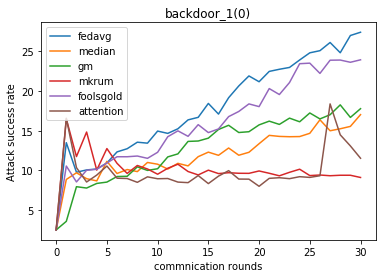

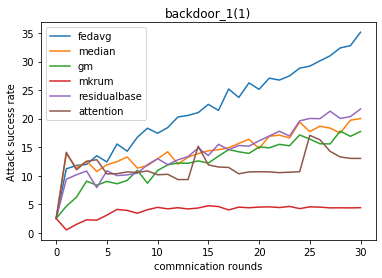

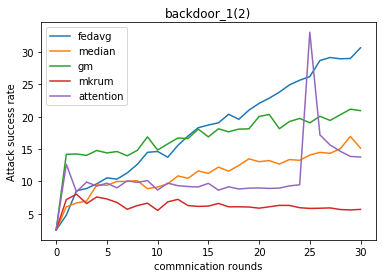

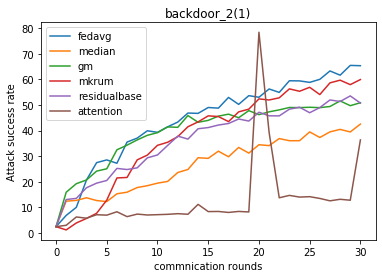

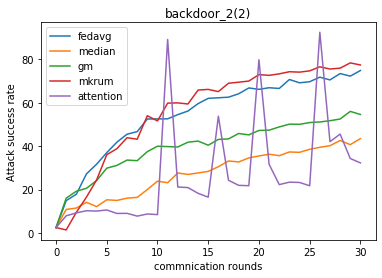

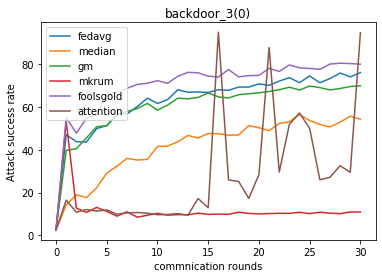

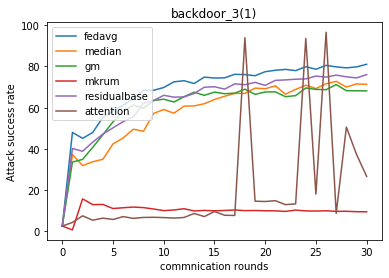

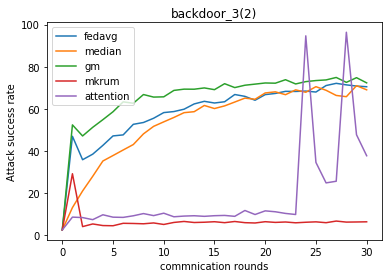

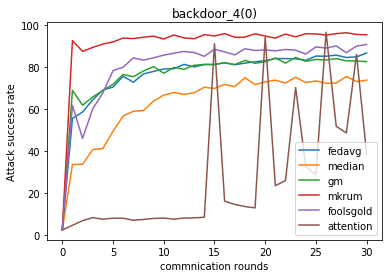

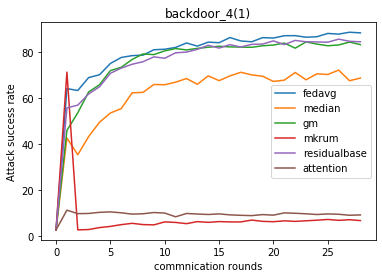

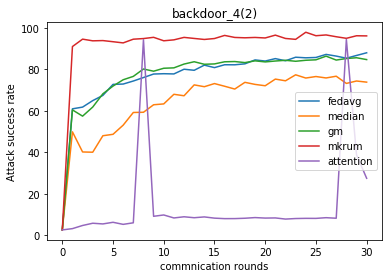

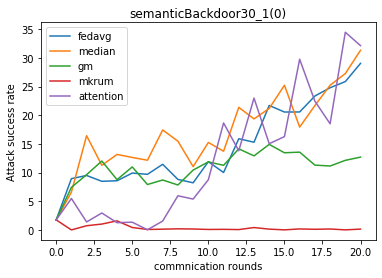

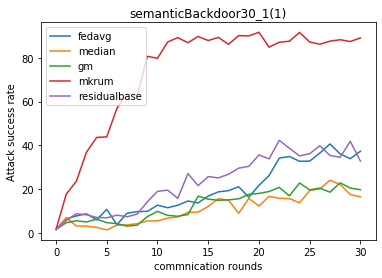

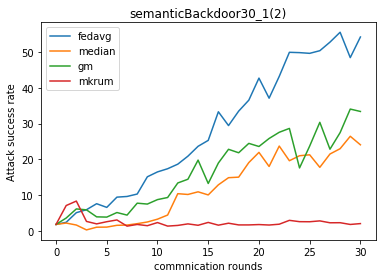

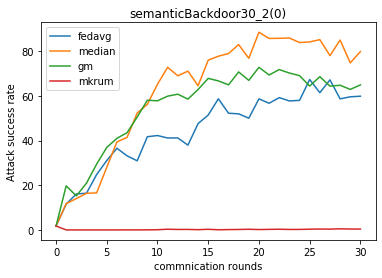

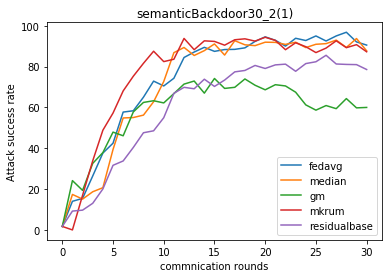

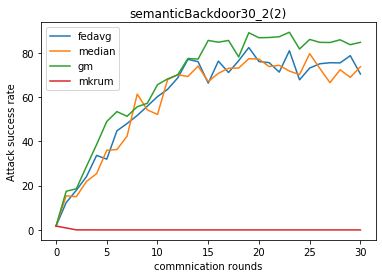

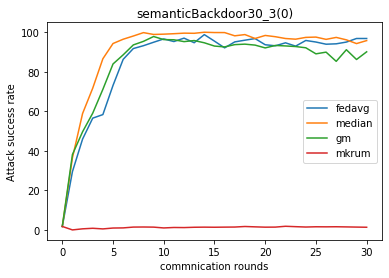

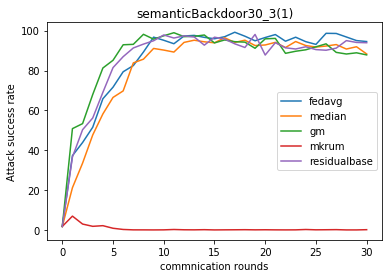

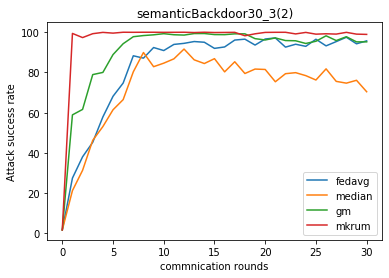

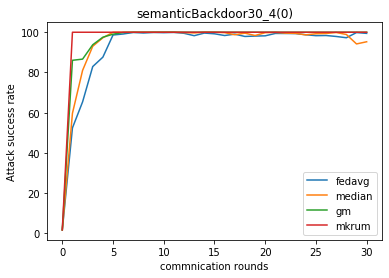

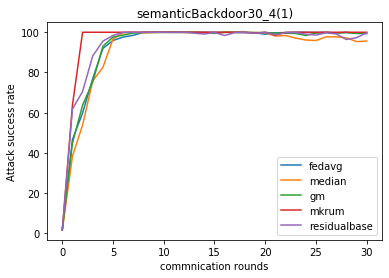

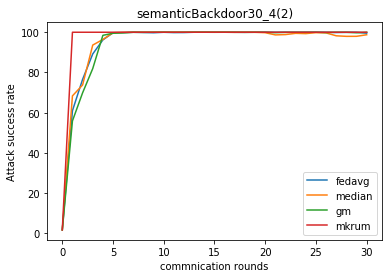

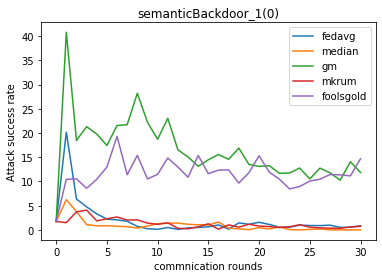

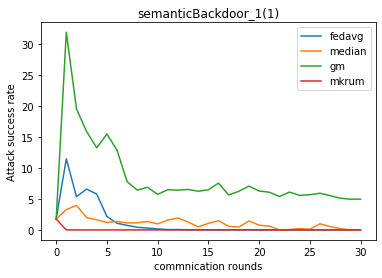

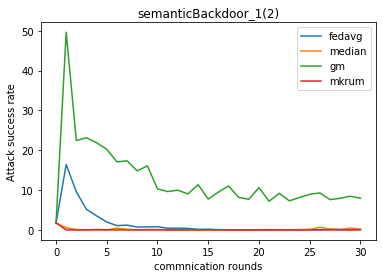

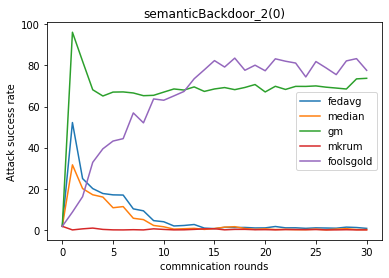

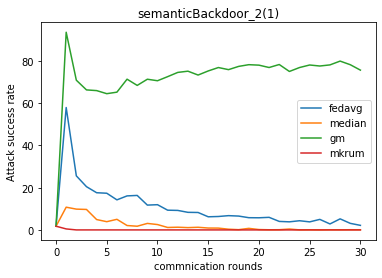

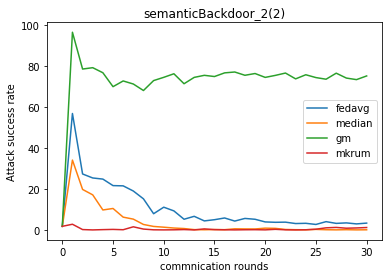

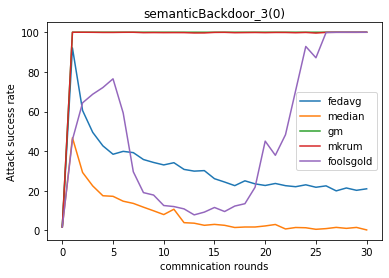

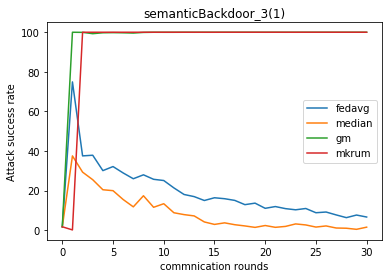

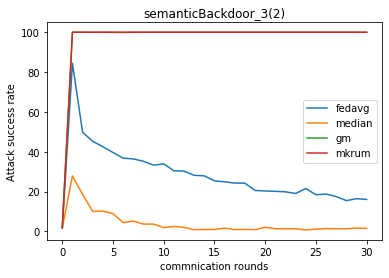

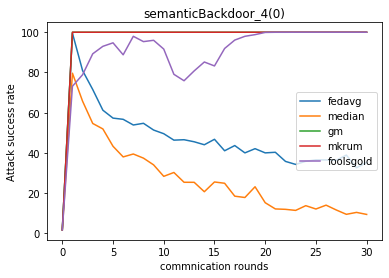

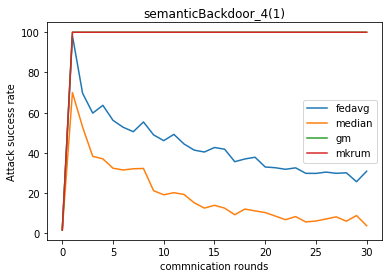

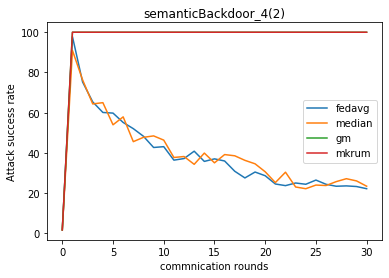

In [36]:
import pandas as pd
j=0
concatAll=pd.DataFrame()
for i in sorted(allcsv):
    DF=dict1[i]
    DF=getSortedColumnsDF(DF)
    title=i.split('/')[4]
    fig=DF.plot(title=title)
    fig.set(xlabel='commnication rounds', ylabel='Attack success rate')
    fig.get_figure().savefig(f"./results/asr/{title}.svg")
    concatAll[title]=DF.iloc[-1]
concatAll.to_csv(f"./results/asr/summary.csv")

In [37]:
concatAll[[i for i in concatAll.columns if "semanticBackdoor30" in i]].groupby((np.arange(12)//3),axis=1).mean() 

,0,1,2,3
fedavg,40.226666,73.600000,95.676666,99.436668
median,23.990000,80.413333,84.816668,96.546666
gm,21.976666,69.883334,91.030001,99.846667
mkrum,30.376667,29.206666,33.466667,100.000000
foolsgold,NaN,NaN,NaN,NaN
attention,32.150002,NaN,NaN,NaN


In [23]:
# import matplotlib.pyplot as plt

# def plot(xdata,ydata,xlabel,ylabel,title,savepath):
#     _,ax=plt.subplots(figsize=(6,6))
#     plt.scatter(xdata,ydata)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     sup=max(ax.get_xlim()[1],ax.get_ylim()[1])
#     inf=min(ax.get_xlim()[0],ax.get_ylim()[0])
#     plt.plot([inf, sup], [inf, sup], ls = "--",c =".3")
#     plt.savefig(savepath)
# plot(a,b,"x","y","title","./results/test.svg")

In [24]:
# a=[1,2,3]
# # b=[4,5,6]

In [25]:
# import pandas as pd
# a=list(np.random.rand(20))
# b=list(np.random.rand(20))
# c=list(np.random.rand(20))
# di={'a':a,'b':b,'c':c}

In [26]:
# df=pd.DataFrame.from_dict({'a':a})

In [27]:
# df.index=a

In [28]:
# files=os.listdir('./results/aggResult/training')

In [29]:
# l1=[]
# for f in files:
#     key=f.split('_')[2]
#     item=pd.read_csv('./results/aggResult/training/'+f)
#     l1.append((key,item))
    


In [30]:
# [i[0] for i in l1]

In [31]:
# def getSorted(L):
#     order=['random','fedavg','median','baseline','aggNet','aggNetRes','aggNetBlock','aggNetBlockMultiple']
#     order=dict(zip(order,range(len(order))))
#     sortedL=[v for i,v in sorted(zip([order[k] for k,i in L],L))]
#     return sortedL

In [32]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})
# for (key,item) in getSorted(l1):
#     df=item
#     x=df.Step
#     y=df.Value
#     start_index=x.where(x==0).last_valid_index()
#     plt.plot(x[start_index:start_index+80],y[start_index:start_index+80],label=key)
# plt.legend()
# plt.xlabel('epochs')
# plt.ylabel('Average BCE loss')
# plt.savefig('./results/aggResult/convergence-BCE.svg')